[View in Colaboratory](https://colab.research.google.com/github/BikashShaw/MLPractice/blob/master/keras_imdb.ipynb)

Loading the IMDB dataset

In [0]:
from tensorflow.python.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Encoding the integer sequences into a binary matrix

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The model definition

In [0]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model


1.   Configuring the optimizer
2.   Using custom losses and metrics



In [0]:
from tensorflow.python.keras import optimizers

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Setting aside a validation set

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training model

In [50]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.5375 - acc: 0.7736 - val_loss: 0.4097 - val_acc: 0.8666
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.3245 - acc: 0.8992 - val_loss: 0.3157 - val_acc: 0.8828
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2338 - acc: 0.9260 - val_loss: 0.2815 - val_acc: 0.8898
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1808 - acc: 0.9403 - val_loss: 0.2745 - val_acc: 0.8885
Epoch 5/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1418 - acc: 0.9550 - val_loss: 0.2780 - val_acc: 0.8878
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1182 - acc: 0.9635 - val_loss: 0.2940 - val_acc: 0.8863
Epoch 7/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0956 - acc: 0.9741 - val_loss: 0.3125 - 

15000/15000 [==============================] - 2s 119us/step - loss: 0.0652 - acc: 0.9836 - val_loss: 0.3812 - val_acc: 0.8716
Epoch 10/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0532 - acc: 0.9876 - val_loss: 0.4073 - val_acc: 0.8713
Epoch 11/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0414 - acc: 0.9912 - val_loss: 0.4161 - val_acc: 0.8761
Epoch 12/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.0345 - acc: 0.9927 - val_loss: 0.4321 - val_acc: 0.8715
Epoch 13/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.0286 - acc: 0.9937 - val_loss: 0.4555 - val_acc: 0.8736
Epoch 14/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0209 - acc: 0.9963 - val_loss: 0.4853 - val_acc: 0.8717
Epoch 15/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0162 - acc: 0.9978 - val_loss: 0.5166 - val_acc: 0.8715
Epoch 16/20
15000/15000 [==============

15000/15000 [==============================] - 2s 118us/step - loss: 0.0065 - acc: 0.9993 - val_loss: 0.6992 - val_acc: 0.8537
Epoch 19/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0043 - acc: 0.9998 - val_loss: 0.7191 - val_acc: 0.8577
Epoch 20/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0048 - acc: 0.9997 - val_loss: 0.6785 - val_acc: 0.8651


Plotting the training and validation loss

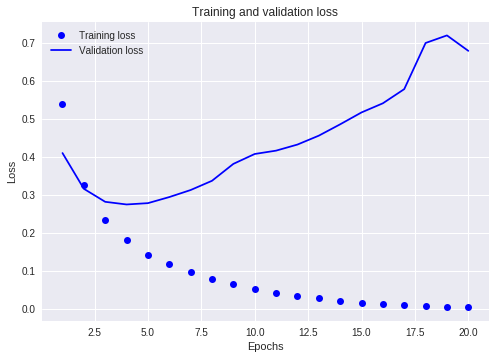

In [51]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

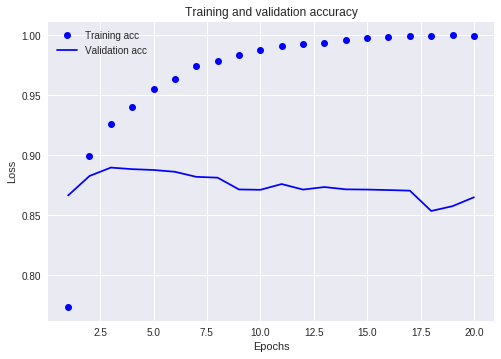

In [52]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluate

In [53]:
results = model.evaluate(x_test, y_test)

print(results)

25000/25000 [==============================] - 2s 73us/step
[0.7558450907611847, 0.84948]


Retraining a model from scratch

In [83]:
model = models.Sequential()

model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)

results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/3
25000/25000 [==============================] - 4s 141us/step - loss: 0.1417 - acc: 0.8276
Epoch 2/3
25000/25000 [==============================] - 2s 96us/step - loss: 0.0777 - acc: 0.9138
Epoch 3/3
25000/25000 [==============================] - 3s 107us/step
[0.08550939569234849, 0.88604]
